# Assignment 1: Basic EDA

1. Read in the "Computers.csv" file.
2. Explore the target variable, "price". Look at a histogram and boxplot of it.
3. Then, produce histograms of the 'speed' and 'ram' variables.
4. Feel free to further explore the dataset!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('darkgrid')

In [ ]:
computers = pd.read_csv("../Data/Computers.csv")
original_computers = copy.deepcopy(computers)

In [ ]:
computers['Price'] = computers['price']
computers.drop(columns=['price'], inplace = True)
computers.rename(columns= lambda x : x.lower(), inplace=True)

In [ ]:
computers.columns


Index(['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium', 'ads',
       'trend', 'price'],
      dtype='object')

In [ ]:
computers = computers.astype(
    {
        'cd': 'category',
        'multi':'category',
        'premium':'category',
    }

)

In [ ]:
computers.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   speed    6259 non-null   int64   
 1   hd       6259 non-null   int64   
 2   ram      6259 non-null   int64   
 3   screen   6259 non-null   int64   
 4   cd       6259 non-null   category
 5   multi    6259 non-null   category
 6   premium  6259 non-null   category
 7   ads      6259 non-null   int64   
 8   trend    6259 non-null   int64   
 9   price    6259 non-null   int64   
dtypes: category(3), int64(7)
memory usage: 361.4 KB


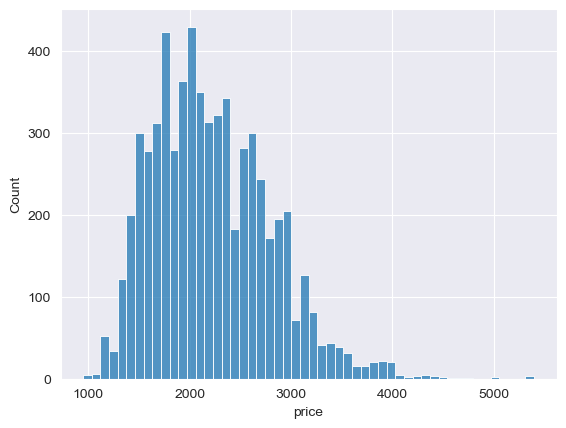

In [ ]:
sns.histplot(computers['price']);

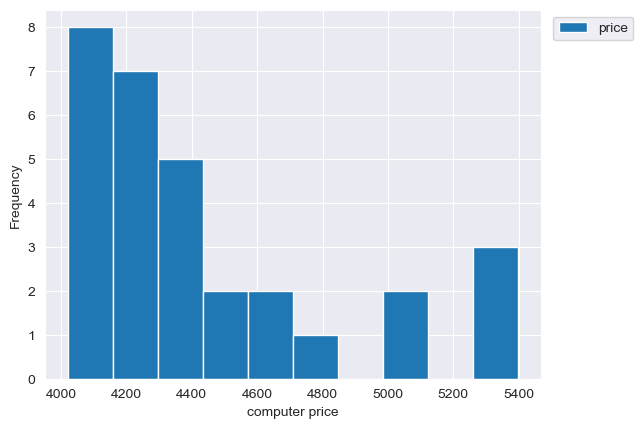

In [ ]:
(
    computers[computers['price'] > 4000][['price']].
    sort_values(['price'], ascending= False).
    plot(kind= 'hist' , xlabel = 'computer price')
).legend(bbox_to_anchor = (1.2,1));

In [ ]:
computers.describe()

,speed,hd,ram,screen,ads,trend,price
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,2219.576610
std,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,580.803956
min,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,949.000000
25%,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,1794.000000
50%,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,2144.000000
75%,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,2595.000000
max,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,5399.000000


In [ ]:
(
    computers[['price']].
    describe(include = 'all').
    round(2)
)

,price
count,6259.00
mean,2219.58
std,580.80
min,949.00
25%,1794.00
50%,2144.00
75%,2595.00
max,5399.00


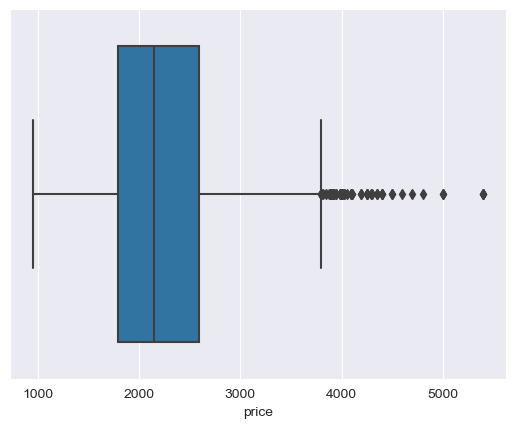

In [ ]:
sns.boxplot(x = computers['price']);

In [ ]:
price_quantile = computers['price'].quantile(q = [0,0.25,0.5,.75,1] , interpolation='nearest')
price_quantile

0.00     949
0.25    1794
0.50    2144
0.75    2595
1.00    5399
Name: price, dtype: int64

In [ ]:
type(price_quantile)

pandas.core.series.Series

In [ ]:
IQR = price_quantile[0.75] - price_quantile[0.25]
IQR

801

In [ ]:
upper_value = price_quantile[0.75] + 1.5*IQR
lower_value = price_quantile[0.25] - 1.5*IQR
upper_value,lower_value

(3796.5, 592.5)

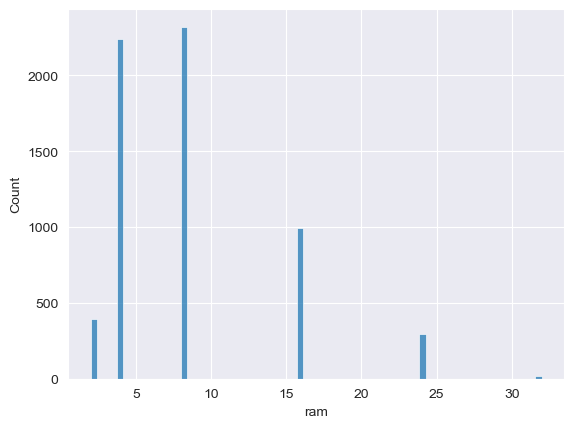

In [ ]:
sns.histplot(x=computers['ram']);

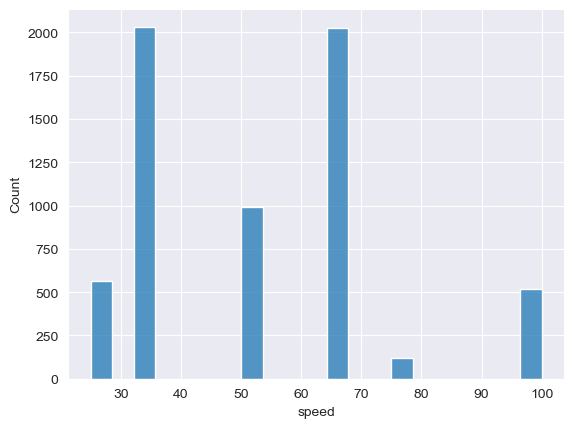

In [ ]:
sns.histplot(x=computers['speed'].sort_values(ascending=True));

In [ ]:
computers.head()

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
0,25,80,4,14,no,no,yes,94,1,1499
1,33,85,2,14,no,no,yes,94,1,1795
2,25,170,4,15,no,no,yes,94,1,1595
3,25,170,8,14,no,no,no,94,1,1849
4,33,340,16,14,no,no,yes,94,1,3295


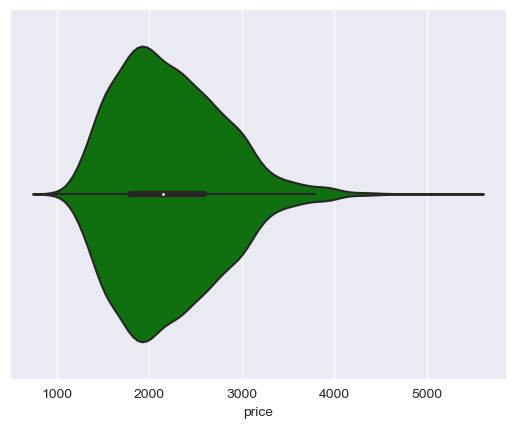

In [ ]:
sns.violinplot(x = computers['price'] , color = 'green',split = True , bw='silverman');

# Assignment 2: Variable Relationships

1. Build a correlation matrix of numeric features and pass it into a heatmap
2. Build a pairplot of numeric features in the data. Hint: df.select_dtypes("number") selects numeric columns. Consider sampling with df.sample(1000) to speed this up if it takes too long.
3. Build an lmplot of ram vs. price. Does being a premium model (premium == 'yes') impact this relationship?

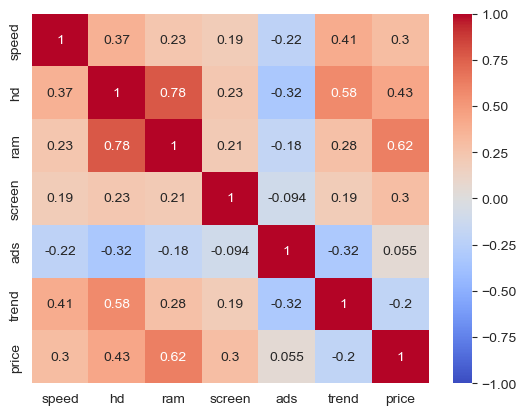

In [ ]:
(
    sns.heatmap(computers.corr(numeric_only= True) ,
                vmin = -1 ,
                vmax = +1 ,
                annot = True,
                cmap = 'coolwarm')
);

In [ ]:
sample_df = computers.select_dtypes(include = 'number').sample(1000)
sample_df

,speed,hd,ram,screen,ads,trend,price
906,33,214,4,14,249,7,2190
3300,50,426,8,14,307,16,2095
2239,33,212,4,14,275,12,1794
2744,33,214,4,14,292,14,1595
3134,100,214,4,14,307,16,2195
...,...,...,...,...,...,...,...
434,33,405,4,14,139,5,2049
765,50,107,2,14,249,7,2144
2566,50,420,4,14,292,14,1825
192,33,213,8,14,100,3,1999


C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


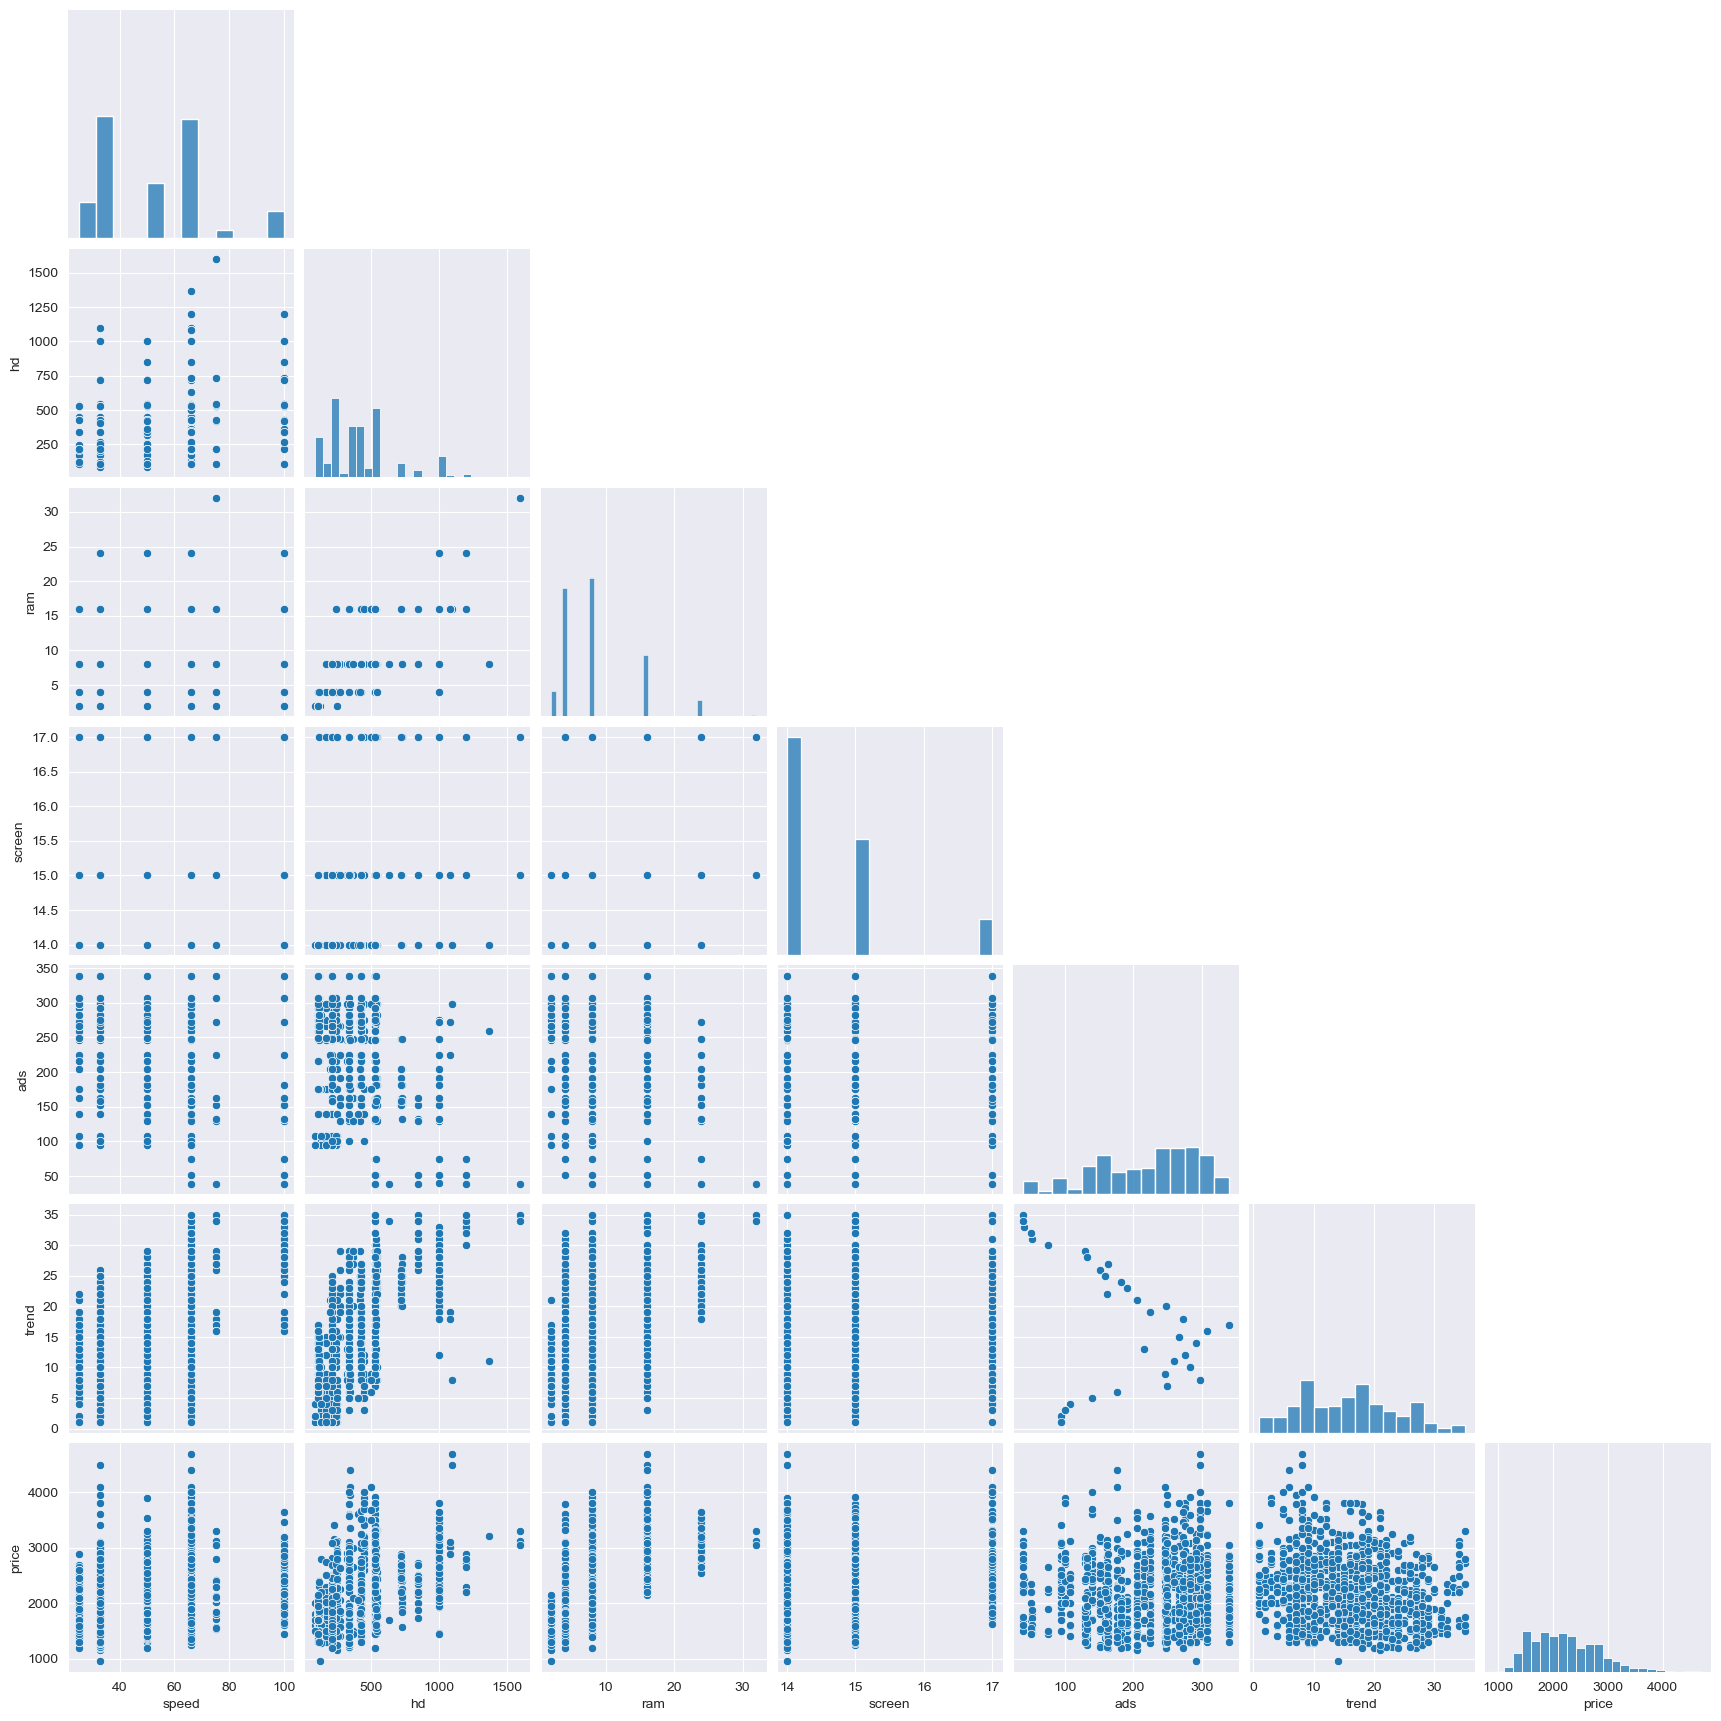

In [ ]:
sns.pairplot(sample_df, corner = True , kind = 'scatter' );

C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


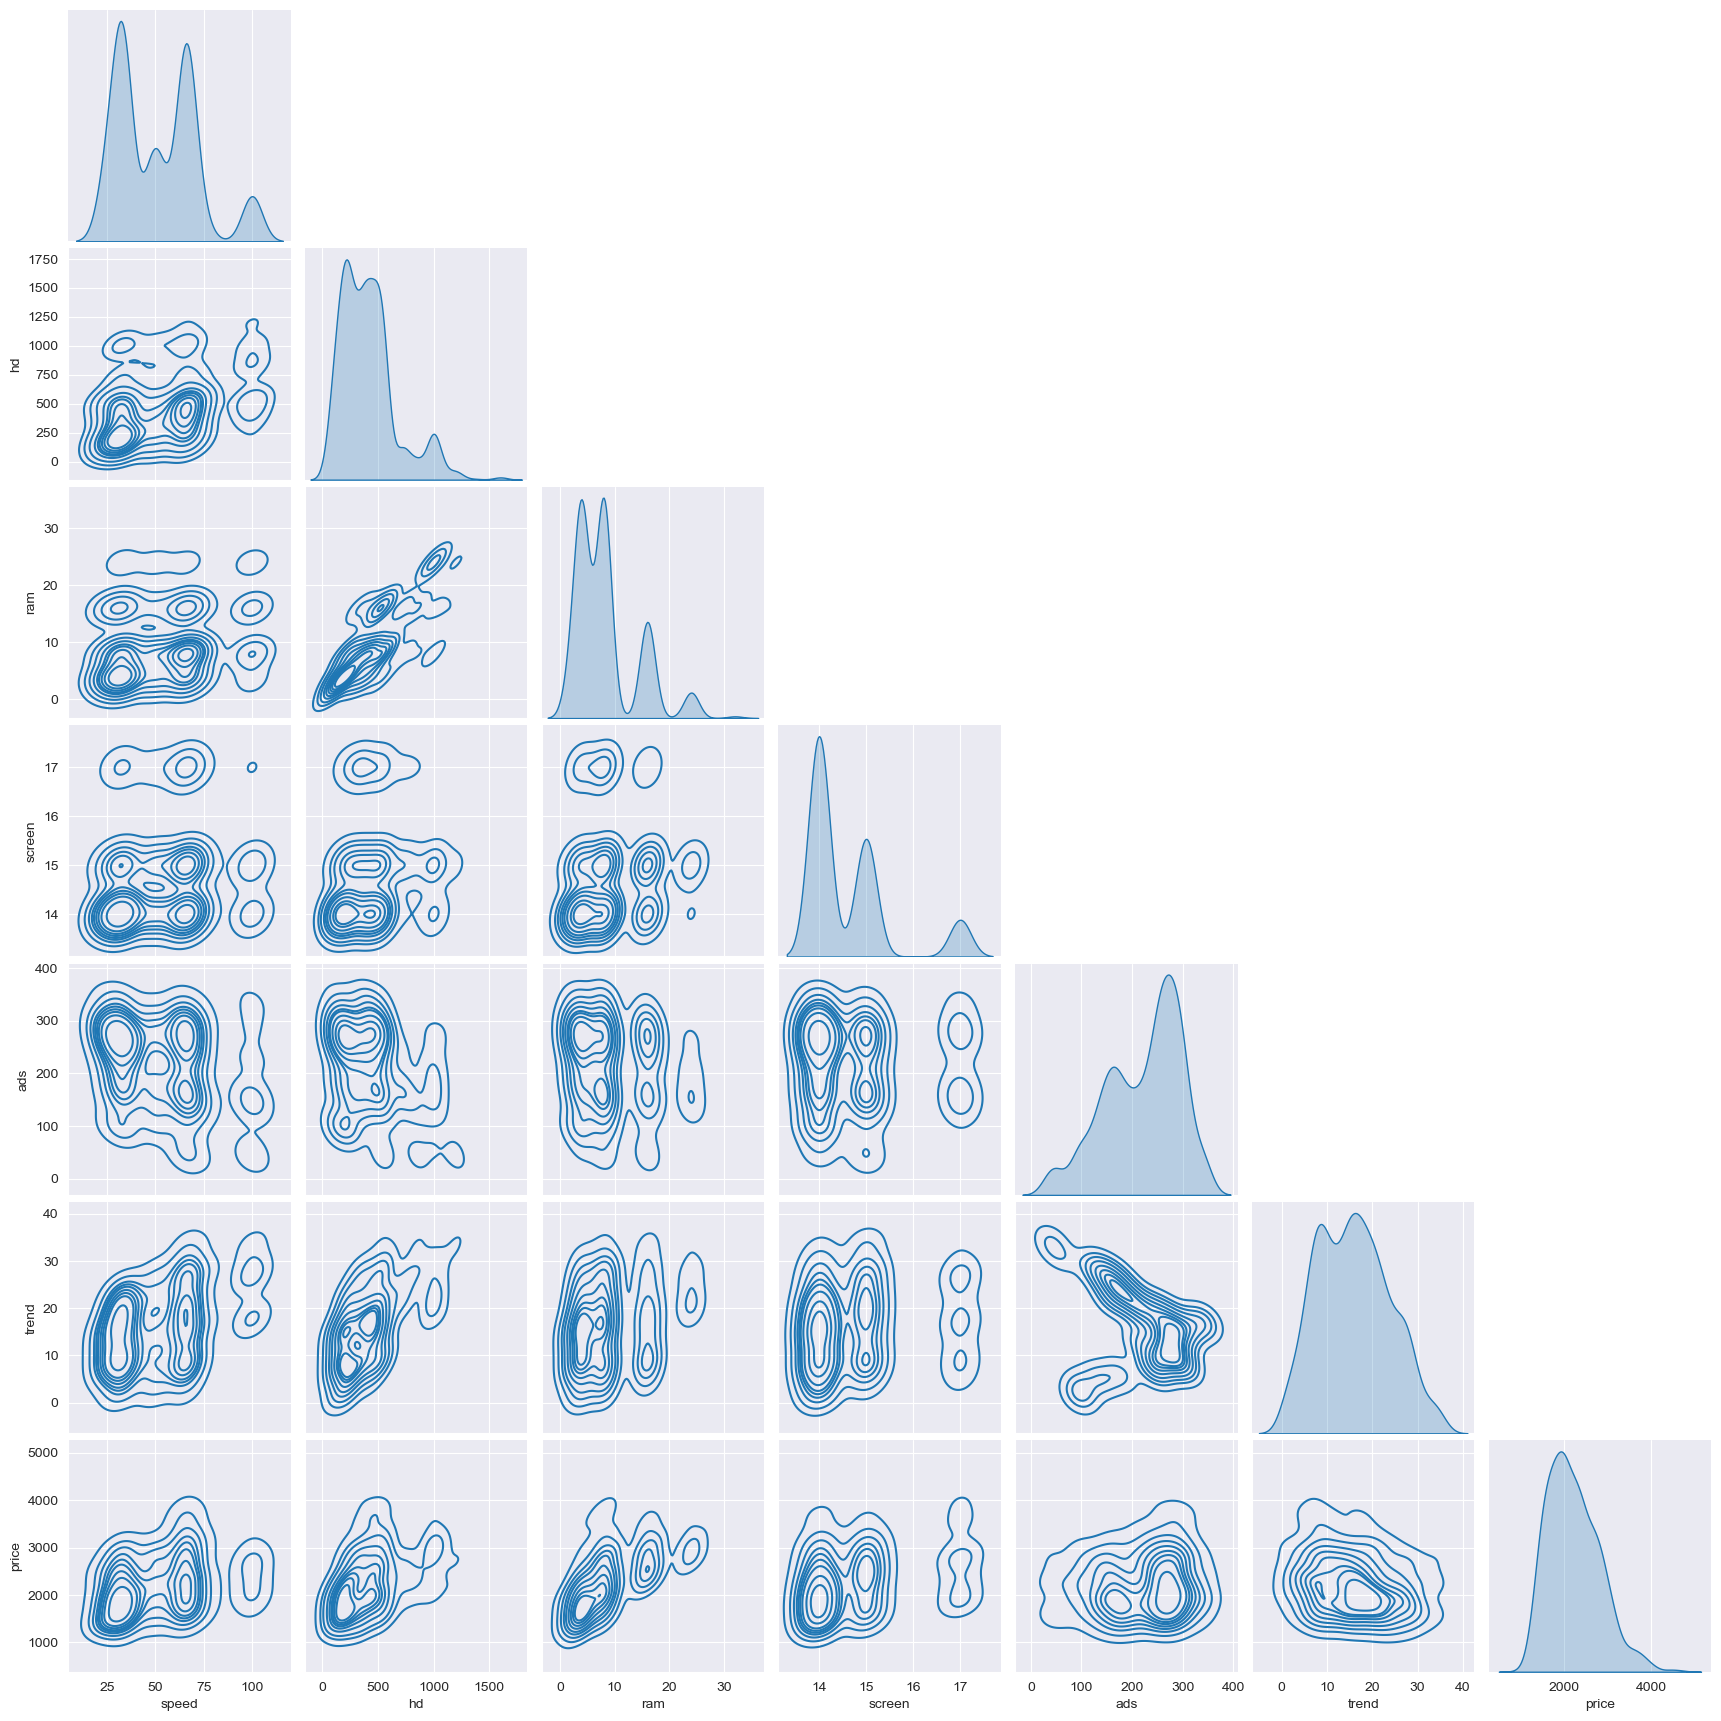

In [ ]:
sns.pairplot(sample_df, corner = True , kind = 'kde' );

C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


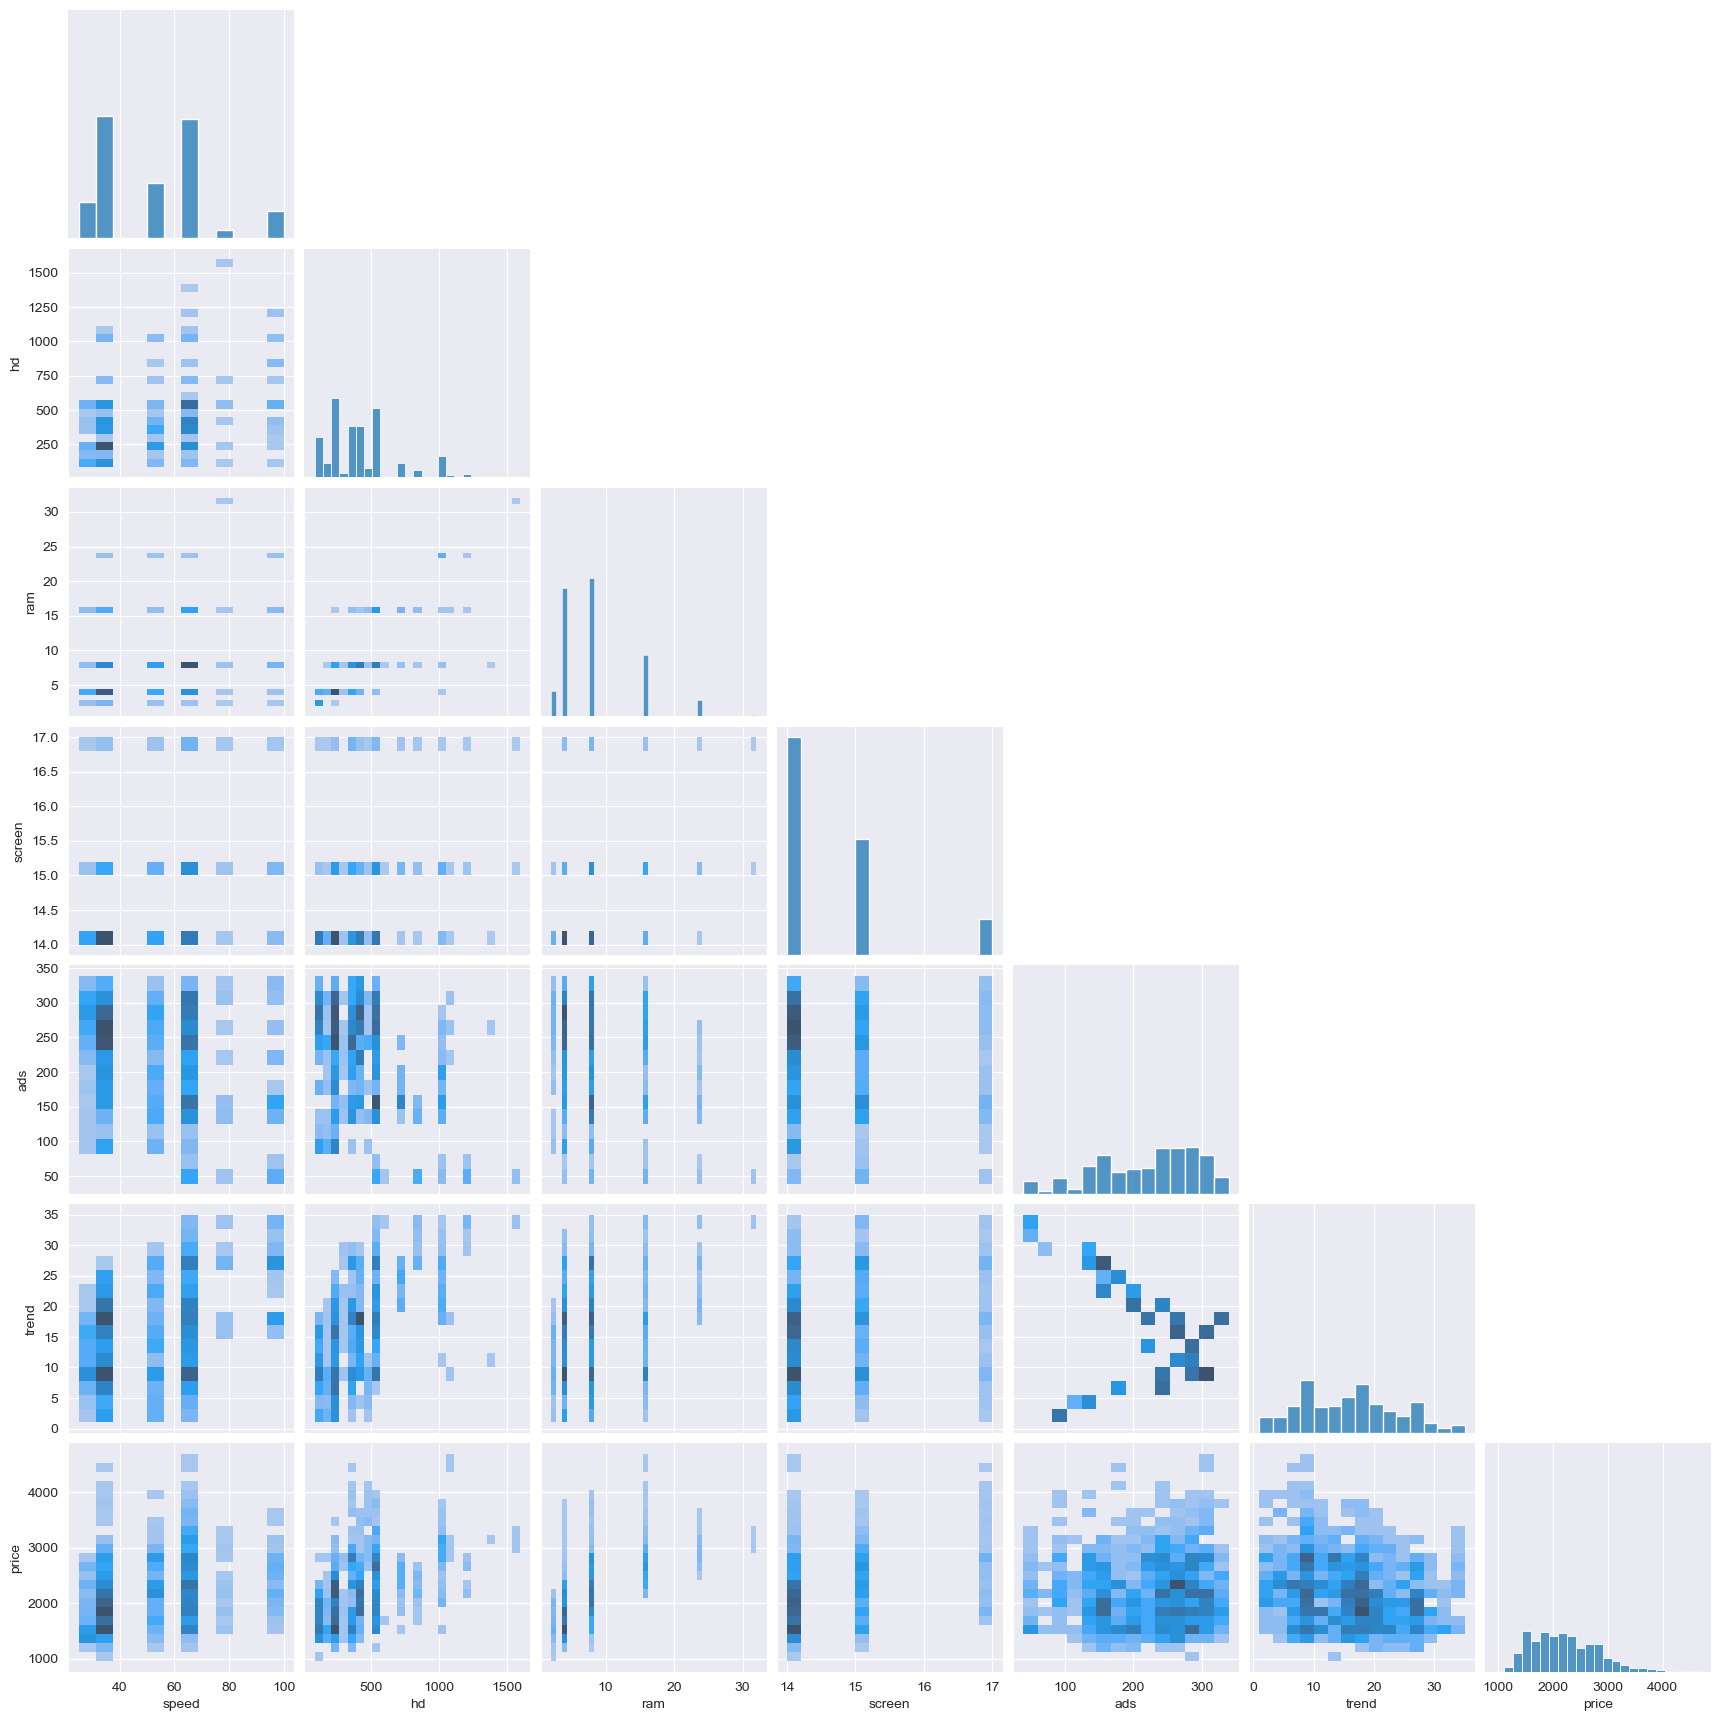

In [ ]:
sns.pairplot(sample_df, corner = True , kind = 'hist' );

C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


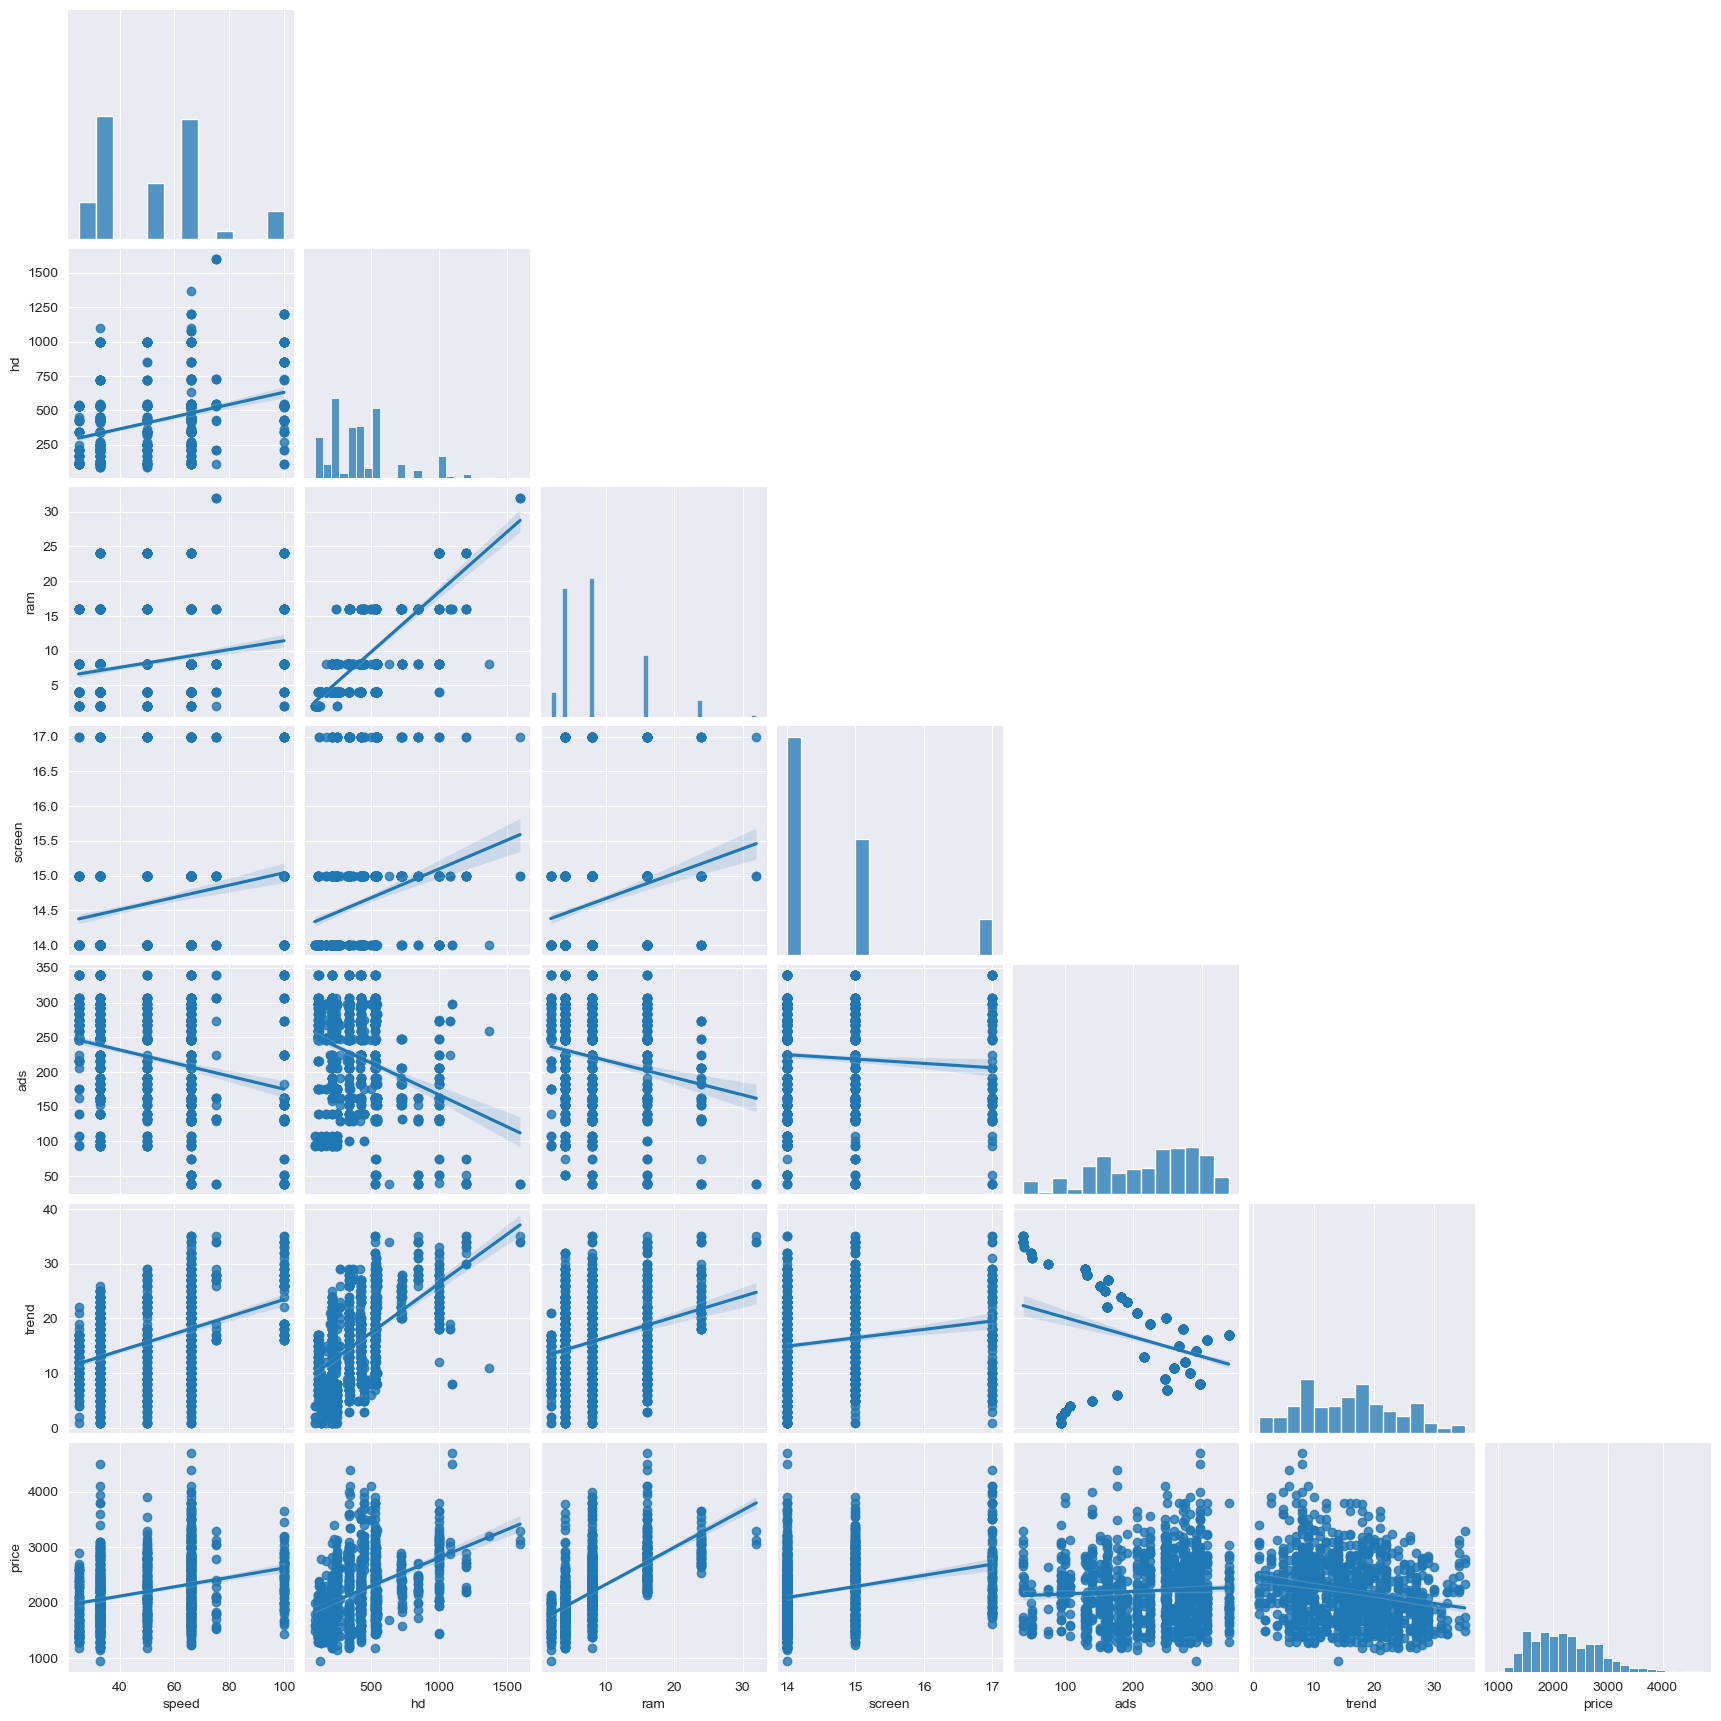

In [ ]:
sns.pairplot(sample_df, corner = True , kind = 'reg' );

In [ ]:
computers.head(10)

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
0,25,80,4,14,no,no,yes,94,1,1499
1,33,85,2,14,no,no,yes,94,1,1795
2,25,170,4,15,no,no,yes,94,1,1595
3,25,170,8,14,no,no,no,94,1,1849
4,33,340,16,14,no,no,yes,94,1,3295
5,66,340,16,14,no,no,yes,94,1,3695
6,25,170,4,14,yes,no,yes,94,1,1720
7,50,85,2,14,no,no,yes,94,1,1995
8,50,210,8,14,no,no,yes,94,1,2225
9,50,210,4,15,no,no,yes,94,1,2575


C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ahmad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


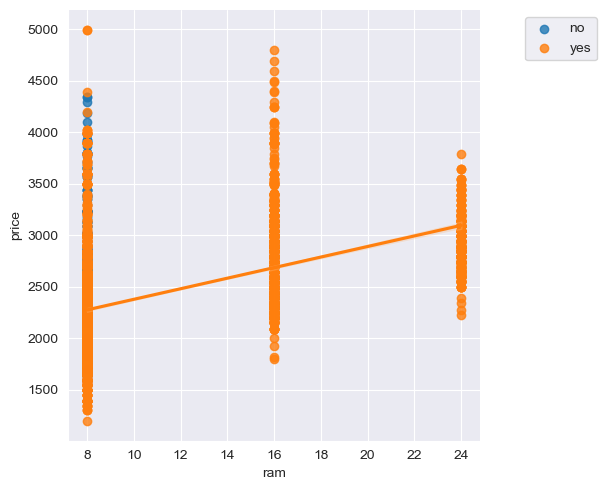

In [ ]:
sns.lmplot(computers.query("5 <ram < 25") , x = 'ram' , y = 'price' , hue = 'premium' , legend = False);
plt.legend(bbox_to_anchor = (1.3,1));